---

# Shading regions inside matplot chart using mplfinance

## https://stackoverflow.com/questions/75572878/

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
df = pd.read_csv('../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df.shape
df.head(2)
df.tail(2)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


[*********************100%***********************]  1 of 1 completed


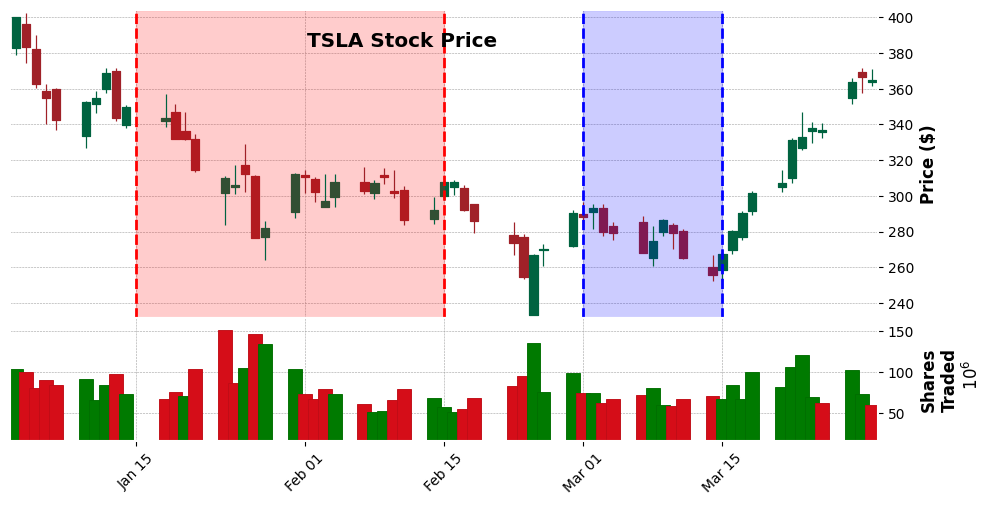

In [4]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Download the stock data
df = yf.download('TSLA', start='2022-01-01', end='2022-03-31')

# Define the date ranges for shading
red_range = ['2022-01-15', '2022-02-15']
blue_range = ['2022-03-01', '2022-03-15']


# Create a function to shade the chart regions
def shade_region(ax, region_dates, color):
    region_dates.sort()

    start_date = region_dates[0]
    end_date = region_dates[1]

    # plot vertical lines
    ax.axvline(pd.to_datetime(start_date), color=color, linestyle='--')
    ax.axvline(pd.to_datetime(end_date), color=color, linestyle='--')

    # create fill
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.fill_between(pd.date_range(start=start_date, end=end_date), ymin, ymax, alpha=0.2, color=color)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)


# Plot the candlestick chart with volume
fig, axlist = mpf.plot(df, type='candle', volume=True, style='charles', 
                        title='TSLA Stock Price', ylabel='Price ($)', ylabel_lower='Shares\nTraded', 
                        figratio=(2,1), figsize=(10,5), tight_layout=True, returnfig=True, show_nontrading=True)

# Get the current axis object
ax = axlist[0]

# Shade the regions on the chart
shade_region(ax, red_range, 'red')
shade_region(ax, blue_range, 'blue')


# Show the plot
mpf.show()

In [5]:
red_range = ['2022-01-15', '2022-02-15']
blue_range = ['2022-03-01', '2022-03-15']


In [38]:
y = df.Volume.values
shift = 0.75*min(y)
y = [y-shift for y in y]
x = [x for x in range(len(y))]

In [39]:
import matplotlib.pyplot as plt

<BarContainer object of 61 artists>

<BarContainer object of 61 artists>

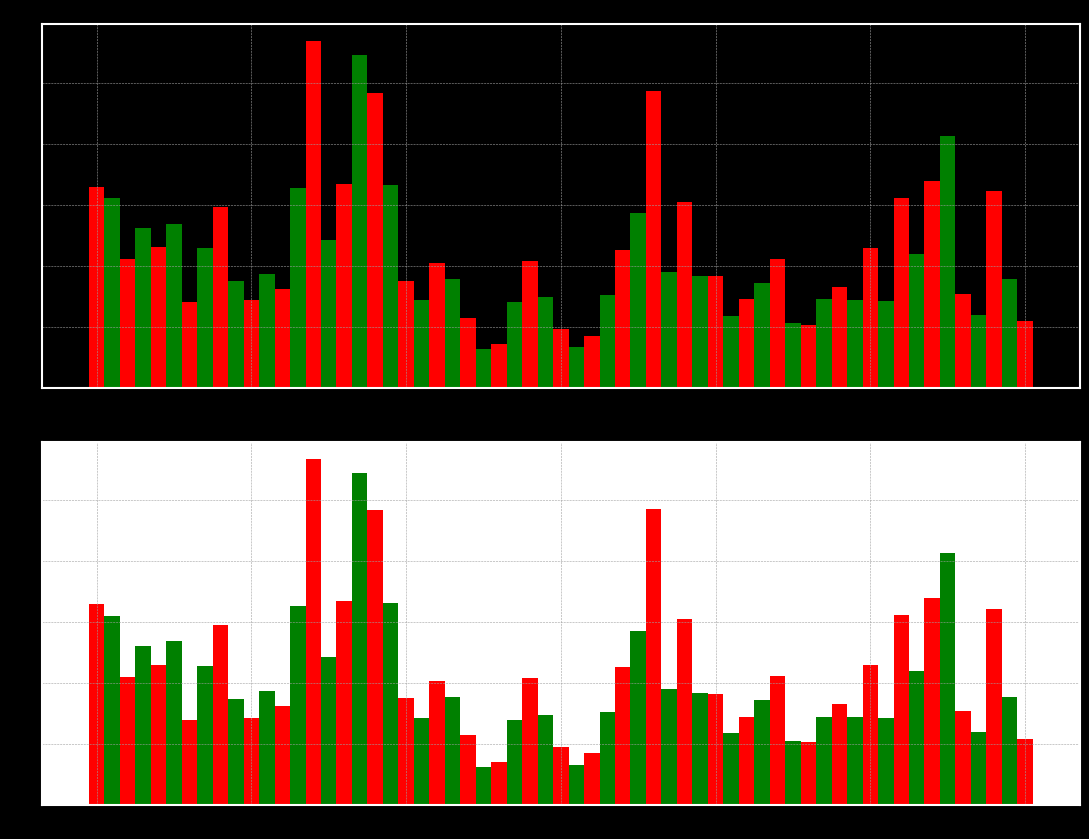

In [56]:
fig, ax = plt.subplots(2,figsize=(11,8.5),facecolor='k',tight_layout=True)
ax[0].set_facecolor('k')
ax[0].bar(x,y,width=1,color=('r','g'))
ax[1].set_facecolor('w')
ax[1].bar(x,y,width=1,color=('r','g'))

In [57]:
import mplfinance._helpers as h

In [75]:
colors = ['r','g']
newcolors = h._adjust_color_brightness(colors,amount=1)

In [76]:
newcolors = newcolors + colors
newcolors + colors

[(1.0, 0.0, 0.0), (0.0, 0.5, 0.0), 'r', 'g', 'r', 'g']

<BarContainer object of 61 artists>

<BarContainer object of 61 artists>

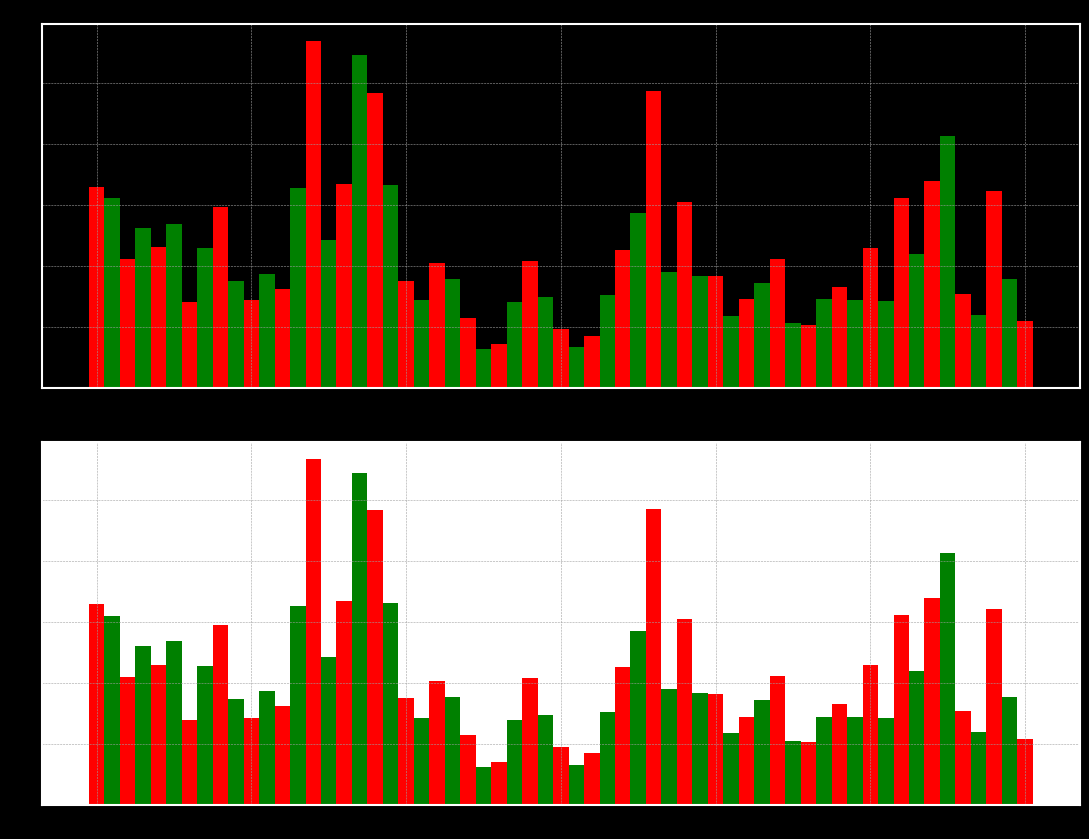

In [77]:
fig, ax = plt.subplots(2,figsize=(11,8.5),facecolor='k',tight_layout=True)
ax[0].set_facecolor('k')
ax[0].bar(x,y,width=1,color=newcolors)
ax[1].set_facecolor('w')
ax[1].bar(x,y,width=1,color=newcolors)

In [79]:
def adjust_color_brightness(color,amount=0.5):
    
    def _adjcb(c1, amount):
        import matplotlib.colors as mc
        import colorsys
        # mc.is_color_like(value)
        try:
            c = mc.cnames[c1]
        except:
            c = c1
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
        return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

    if not isinstance(color,(list,tuple)):
        return _adjcb(color,amount)
        
    cout = []
    cadj = {}
    for c1 in color:
        if c1 in cadj:
            cout.append(cadj[c1])
        else:
            newc = _adjcb(c1,amount)
            cadj[c1] = newc
            cout.append(cadj[c1])
    return cout

In [81]:
import matplotlib.colors as mc
import colorsys

In [82]:
mc.cnames['red']

'#FF0000'

In [83]:
dir(mc)

['AsinhNorm',
 'BASE_COLORS',
 'BoundaryNorm',
 'CSS4_COLORS',
 'CenteredNorm',
 'ColorConverter',
 'ColorSequenceRegistry',
 'Colormap',
 'FuncNorm',
 'Image',
 'LightSource',
 'LinearSegmentedColormap',
 'ListedColormap',
 'LogNorm',
 'Mapping',
 'NoNorm',
 'Normalize',
 'Number',
 'PngInfo',
 'PowerNorm',
 'Sequence',
 'Sized',
 'SymLogNorm',
 'TABLEAU_COLORS',
 'TwoSlopeNorm',
 'XKCD_COLORS',
 '_ColorMapping',
 '_REPR_PNG_SIZE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_check_color_like',
 '_cm',
 '_color_sequences',
 '_colors_full_map',
 '_create_empty_object_of_class',
 '_create_lookup_table',
 '_has_alpha_channel',
 '_is_nth_color',
 '_make_norm_from_scale',
 '_picklable_norm_constructor',
 '_sanitize_extrema',
 '_to_rgba_no_colorcycle',
 '_vector_magnitude',
 'base64',
 'cbook',
 'cnames',
 'colorConverter',
 'from_levels_and_colors',
 'functools',
 'get_named_colors_mapping',
 'hex2color',
 'he

In [89]:
mc.hex2color('red')

(1.0, 0.0, 0.0)

In [142]:
#c = [int(v*255) for v in mc.to_rgb('blue')]
adj = 0.6
c = [min(1.0,v+adj) for v in mc.to_rgb('k')]
c

[0.6, 0.6, 0.6]

In [168]:
def plot_color(c):
    fig, ax = plt.subplots(figsize=(1.2,0.6),facecolor='k')
    ax.set_axis_off()
    ax.bar([0],[1],color=c)

[0.5490196078431373, 0.33725490196078434, 0.29411764705882354] 

[0.7490196078431373, 0.5372549019607844, 0.49411764705882355] 

[0.9490196078431373, 0.7372549019607844, 0.6941176470588235] 

[1.0, 0.8372549019607843, 0.7941176470588236] 

[1.0, 0.9372549019607843, 0.8941176470588235] 

[1.0, 1.0, 0.9941176470588236] 

[1.0, 1.0, 1.0] 



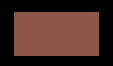

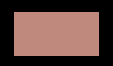

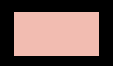

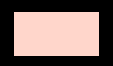

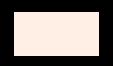

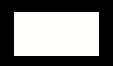

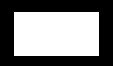

In [169]:
color = mc.to_rgb('orange')
color = mc.to_rgb('lime')
color = mc.to_rgb('cyan')
color = mc.to_rgb('#7f7f7f')
color = mc.to_rgb('#bcbd22')
color = mc.to_rgb('#8c564b')
for adj in [0,0.2,0.4,0.5,0.6,0.7,0.8]:
    c = [min(1.0,v+adj) for v in color]
    print(c,'\n')
    plot_color(c)